In [7]:
import pandas as pd
import numpy as np

from astropy.table import Table
import astropy

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib

In [2]:
%matplotlib notebook

In [3]:
print('numpy version: {}'.format(np.__version__))
print('pandas version: {}'.format(pd.__version__))
print('matplotlib version: {}'.format(matplotlib.__version__))

numpy version: 1.15.4
pandas version: 0.23.4
matplotlib version: 3.0.1


# Figure 7

Create Figure 7 (the host-galaxy offset of ASAS-SN SNe relative to SNe in the ZTF BTS) in [Fremling et al. 2020](https://ui.adsabs.harvard.edu/abs/2019arXiv191012973F/abstract).

Data for ASAS-SN are from [Holoien et al. 2019](https://ui.adsabs.harvard.edu/abs/2019MNRAS.484.1899H/abstract).

In [4]:
# BTS data
bts_df = pd.read_hdf('../data/final_rcf_table.h5')

In [5]:
z_sn = bts_df.z_sn.values
z_host = bts_df.z_host.values

norm_Ia = np.where( ( (bts_df.sn_type == 'Ia-norm') | 
                      (bts_df.sn_type == 'Ia') | 
                      (bts_df.sn_type == 'Ia-91bg') | 
                      (bts_df.sn_type == 'Ia-91T') | 
                      (bts_df.sn_type == 'Ia-99aa') | 
                      (bts_df.sn_type == 'ia')
                     | (bts_df.sn_type == 'Ia-norm*')
                     | (bts_df.sn_type == 'Ia-91T*')
                     | (bts_df.sn_type == 'Ia-91T**')
                     | (bts_df.sn_type == 'SN Ia')
                    )
                  )

norm_cc = np.where( (bts_df.sn_type == 'IIb') | 
                    (bts_df.sn_type == 'Ib') | 
                    (bts_df.sn_type == 'IIP') | 
                    (bts_df.sn_type == 'Ib/c') | 
                    (bts_df.sn_type == 'Ic-norm') | 
                    (bts_df.sn_type == 'IIn') | 
                    (bts_df.sn_type == 'IIL') | 
                    (bts_df.sn_type == 'Ic-broad') | 
                    (bts_df.sn_type == 'II') | 
                    (bts_df.sn_type == 'II-pec') | 
                    (bts_df.sn_type == 'Ib-pec') | 
                    (bts_df.sn_type == 'Ic') | 
                    (bts_df.sn_type == 'Ic-BL') | 
                    (bts_df.sn_type == 'IIP*') | 
                    (bts_df.sn_type == 'II*') | 
                    (bts_df.sn_type == 'Ibn') | 
                    (bts_df.sn_type == 'II**') | 
                    (bts_df.sn_type == 'Ib-norm') | 
                    (bts_df.sn_type == 'IIn*')
                  )

has_host_z = np.where((z_host > 0) & np.isfinite(z_host))
no_host = np.where((z_host < 0) | np.isnan(z_host))

has_host_cc = np.intersect1d(has_host_z, norm_cc)
has_host_ia = np.intersect1d(has_host_z, norm_Ia)

no_host_cc = np.intersect1d(no_host, norm_cc)
no_host_ia = np.intersect1d(no_host, norm_Ia)

z_mix = z_sn.copy()
z_mix[has_host_z] = z_host[has_host_z]

#### Read in SN data from ASAS-SN

In [8]:
n_asas_ia = 0
n_asas_91T = 0
n_asas_91bg = 0
n_asas_ii = 0
n_asas_ibc = 0
n_asas_slsn = 0
asas_offset = np.array([])

for release in ['1','2','3','4']:
    tab1 = '../data/ASAS_SN/bright_sn_catalog_{}/table1.txt'.format(release)
    tab2 = '../data/ASAS_SN/bright_sn_catalog_{}/table2.txt'.format(release)

    asassn_tab1 = Table.read(tab1, format='cds')
    asassn_tab2 = Table.read(tab2, format='cds')

    n_asas_ia += len(np.where( (asassn_tab1['Type'] == 'Ia') | 
                        (asassn_tab1['Type'] == 'Ia-91T') | 
                        (asassn_tab1['Type'] == 'Ia-91bg') | 
                        (asassn_tab1['Type'] == 'Ia+CSM') |
                        (asassn_tab1['Type'] == 'Ia-pec') |
                        (asassn_tab1['Type'] == 'Ia-00cx') |
                        (asassn_tab1['Type'] == 'Ia-06bt') |
                        (asassn_tab1['Type'] == 'Ia-07if') |
                        (asassn_tab1['Type'] == 'Ia-09dc') |
                        (asassn_tab1['Type'] == 'Ia-02cx')
                       )[0])

    n_asas_91T += len(np.where( (asassn_tab1['Type'] == 'Ia-91T') )[0])
    n_asas_91bg += len(np.where( (asassn_tab1['Type'] == 'Ia-91bg') )[0])

    
    n_asas_ii += len(np.where( (asassn_tab1['Type'] == 'II') | 
                        (asassn_tab1['Type'] == 'IIP') | 
                        (asassn_tab1['Type'] == 'IIb') | 
                        (asassn_tab1['Type'] == 'II-pec') | 
                        (asassn_tab1['Type'] == 'IIn') |
                        (asassn_tab1['Type'] == 'IIn-pec') |
                        (asassn_tab1['Type'] == 'IIn/LBV') |
                        (asassn_tab1['Type'] == 'IIn-09ip') 
                       )[0])

    n_asas_ibc += len(np.where( (asassn_tab1['Type'] == 'Ib') | 
                         (asassn_tab1['Type'] == 'Ib/c') | 
                         (asassn_tab1['Type'] == 'Ibn') | 
                         (asassn_tab1['Type'] == 'Ic') |
                         (asassn_tab1['Type'] == 'Ic-pec') |
                         (asassn_tab1['Type'] == 'Ib/c-BL') |
                         (asassn_tab1['Type'] == 'Ic-BL')
                        )[0])

    n_asas_slsn += len(np.where( (asassn_tab1['Type'] == 'SLSN-II') | 
                          (asassn_tab1['Type'] == 'SLSN-I')
                         )[0])
    
    n_asas_ia += len(np.where( ( (asassn_tab2['Type'] == 'Ia') | 
                            (asassn_tab2['Type'] == 'Ia-91T') | 
                            (asassn_tab2['Type'] == 'Ia-91bg') | 
                            (asassn_tab2['Type'] == 'Ia+CSM') |
                            (asassn_tab2['Type'] == 'Ia-pec') |
                            (asassn_tab2['Type'] == 'Ia-00cx') |
                            (asassn_tab2['Type'] == 'Ia-06bt') |
                            (asassn_tab2['Type'] == 'Ia-07if') |
                            (asassn_tab2['Type'] == 'Ia-09dc') |
                            (asassn_tab2['Type'] == 'Ia-02cx')
                         ) & 
                         (asassn_tab2['Recovered'] == 'Yes')
                       )[0])

    n_asas_91T += len(np.where( (asassn_tab2['Type'] == 'Ia-91T')  & 
                         (asassn_tab2['Recovered'] == 'Yes')
                       )[0])
    n_asas_91bg += len(np.where( (asassn_tab2['Type'] == 'Ia-91bg')  & 
                         (asassn_tab2['Recovered'] == 'Yes')
                       )[0])

    n_asas_ii += len(np.where( ( (asassn_tab2['Type'] == 'II') | 
                            (asassn_tab2['Type'] == 'IIP') | 
                            (asassn_tab2['Type'] == 'IIb') | 
                            (asassn_tab2['Type'] == 'II-pec') | 
                            (asassn_tab2['Type'] == 'IIn') |
                            (asassn_tab2['Type'] == 'IIn-pec') |
                            (asassn_tab2['Type'] == 'IIn/LBV') |
                            (asassn_tab2['Type'] == 'IIn-09ip')
                         ) & 
                         (asassn_tab2['Recovered'] == 'Yes')
                       )[0])

    n_asas_ibc += len(np.where( ( (asassn_tab2['Type'] == 'Ib') | 
                             (asassn_tab2['Type'] == 'Ib/c') | 
                             (asassn_tab2['Type'] == 'Ibn') | 
                             (asassn_tab2['Type'] == 'Ic') |
                             (asassn_tab2['Type'] == 'Ic-pec') |
                             (asassn_tab2['Type'] == 'Ib/c-BL') |
                             (asassn_tab2['Type'] == 'Ic-BL')
                          ) &
                          (asassn_tab2['Recovered'] == 'Yes')
                        )[0])

    n_asas_slsn += len(np.where( ( (asassn_tab2['Type'] == 'SLSN-II') | 
                             (asassn_tab2['Type'] == 'SLSN-I')
                           ) & 
                           (asassn_tab2['Recovered'] == 'Yes')
                         )[0])

    asas_offset = np.append(asas_offset, np.array(asassn_tab1['Offset'][asassn_tab1['HostName'] != 'None'], dtype=float))
    asas_offset = np.append(asas_offset, 
                            np.array(asassn_tab2['Offset'][np.where((asassn_tab2['Recovered'] == 'Yes') & 
                                                                    (asassn_tab2['SNName'] != 'PS16dtm'))], dtype=float))
    
tot_asas = n_asas_ia + n_asas_ii + n_asas_ibc + n_asas_slsn

In [10]:
bts_df.columns

Index(['ZTF_Name', 'TNS_Name', 'discovered_by', 'tns_internal_name', 'RA_sn',
       'Dec_sn', 'sn_type', 'z_sn', 'g_jd_max', 'g_max', 'g_unc_max',
       'r_jd_max', 'r_max', 'r_unc_max', 'ebv', 'host_name_PS1', 'RA_host_PS1',
       'Dec_host_PS1', 'z_host', 'sep', 'projected_kpc', 'gKron_PS1',
       'rKron_PS1', 'iKron_PS1', 'zKron_PS1', 'yKron_PS1', 'w1_host',
       'w2_host', 'ebv_host'],
      dtype='object')

In [24]:
bts_df.sep.values

array([4.44485743e+00, 9.52850036e+00, 3.31881520e-01, 2.68274112e+01,
       5.43292613e+00, 7.94078366e+00,            nan, 2.39959053e+00,
       1.35916339e+00, 1.00899742e+01, 8.88271735e+00, 7.33530011e+01,
       4.34891069e+00, 1.42943735e+01, 4.74159957e+00, 5.63862894e+00,
       5.21754119e+00, 1.23435837e+01, 2.07937978e-01, 6.20015331e-01,
       7.06606626e-01, 1.06750894e+01, 9.67519684e-01, 2.00804621e+00,
       2.18795799e+00, 4.88205226e+00,            nan, 9.93827068e-01,
       1.07775314e+00, 6.69541372e+00, 3.47139884e+00, 3.57288558e-01,
       5.30205929e-01, 1.83096695e+00,            nan, 2.81590179e+00,
       2.45374870e+01, 3.70811036e+00, 1.82878257e+01, 8.00142880e-01,
       6.93737668e-01, 2.13853916e+01, 7.19722576e-01, 2.37015641e+05,
       6.92161867e-01, 1.25965574e+00, 1.16944675e+01, 1.44612302e+00,
       1.55904649e+01, 1.20793960e+00, 2.30897572e-01, 1.60794955e+01,
       6.08854321e+00, 2.73657620e+00, 1.38977996e+00, 4.20788286e+00,
      

In [26]:
not_ambiguous = np.where(np.isfinite(bts_df.sep))

brighter_than_17 = np.where((bts_df.g_max < 17) | (bts_df.r_max < 17))
bright_bts = np.intersect1d(not_ambiguous, brighter_than_17)
print(len(bright_bts))

79


<IPython.core.display.Javascript object>


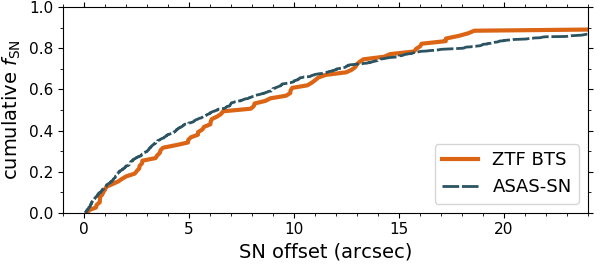

In [29]:
color_dict = {'blue': '#2C5361',
              'orange': '#DB6515', 
              'yellow': '#CA974C', 
              'maroon': '#3B2525', 
              'purple': '#A588AC',
              'beige': '#D2A176'}


fig, ax1 = plt.subplots(1, 1, figsize=(6,8/3))
ax1.plot(np.sort(bts_df.sep.iloc[bright_bts]), 
         np.arange(len(bts_df.sep.iloc[bright_bts]))/float(len(bts_df.sep.iloc[bright_bts])),
         label = 'ZTF BTS',
         lw=3, color=color_dict['orange'])

ax1.plot(np.sort(asas_offset),
         np.arange(len(asas_offset))/float(len(asas_offset)),
         label = 'ASAS-SN',        
         lw=2, dashes=[6, 1],
         color=color_dict['blue'])
    
ax1.set_xlabel('SN offset (arcsec)',fontsize=14)
ax1.legend(loc=4, fontsize=13)
ax1.set_xlim(-1, 24)
ax1.set_ylim(0,1)
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(.1))
ax1.set_ylabel('cumulative $f_\mathrm{SN}$',fontsize=14)
ax1.tick_params(top=True,right=True,labelsize=11,which='both')

fig.subplots_adjust(left=0.105,bottom=0.2,top=0.97,right=0.98, hspace=0.3)
fig.savefig('ZTF_ASASSN_offset.pdf')